In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold, manifold

# LLE它能够使降维后的数据较好地保持原有 流形结构

In [8]:
# 使用sklearn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    return iris.data,iris.target

In [12]:
def test_LLE(*data):
    x, y = data
    for n in (4,3,2,1):
        lle = manifold.LocallyLinearEmbedding(n_components=n)
        lle.fit(x)
        # 显示重构误差
        print('reconstruction_error(n_components={0}) :{1}'.format(n, lle.reconstruction_error_))

x,y =load_data()
test_LLE(x,y)

reconstruction_error(n_components=4) :7.199368774565022e-07
reconstruction_error(n_components=3) :3.8706050848036315e-07
reconstruction_error(n_components=2) :6.641421102177113e-08
reconstruction_error(n_components=1) :3.876930801133758e-15


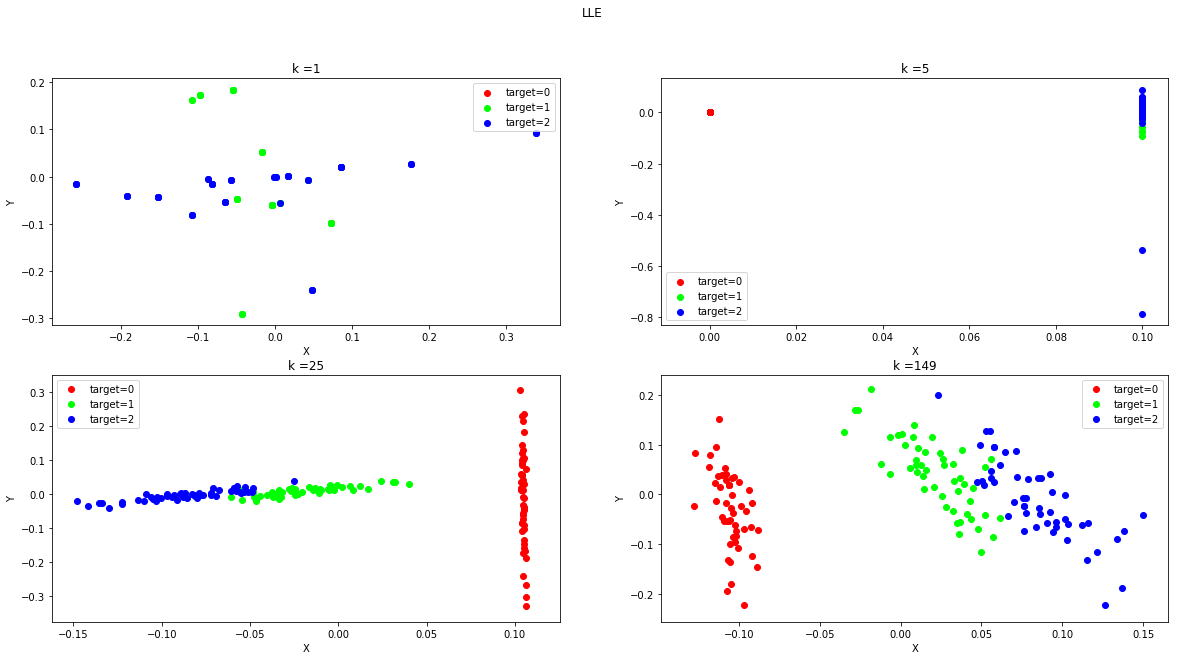

In [13]:
# 将数据降低至2维
def plot_LLE_k(*data):
    x,y = data
    Ks = [1,5,25,y.size-1]
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    for i,k in enumerate(Ks):
        lle = manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=k)
        x_r = lle.fit_transform(x)
        
        ax = fig.add_subplot(2,2,i+1)
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='best')
        ax.set_title('k ={0}'.format(k))
    plt.suptitle('LLE')
    plt.show()

x,y =load_data()
plot_LLE_k(x,y)

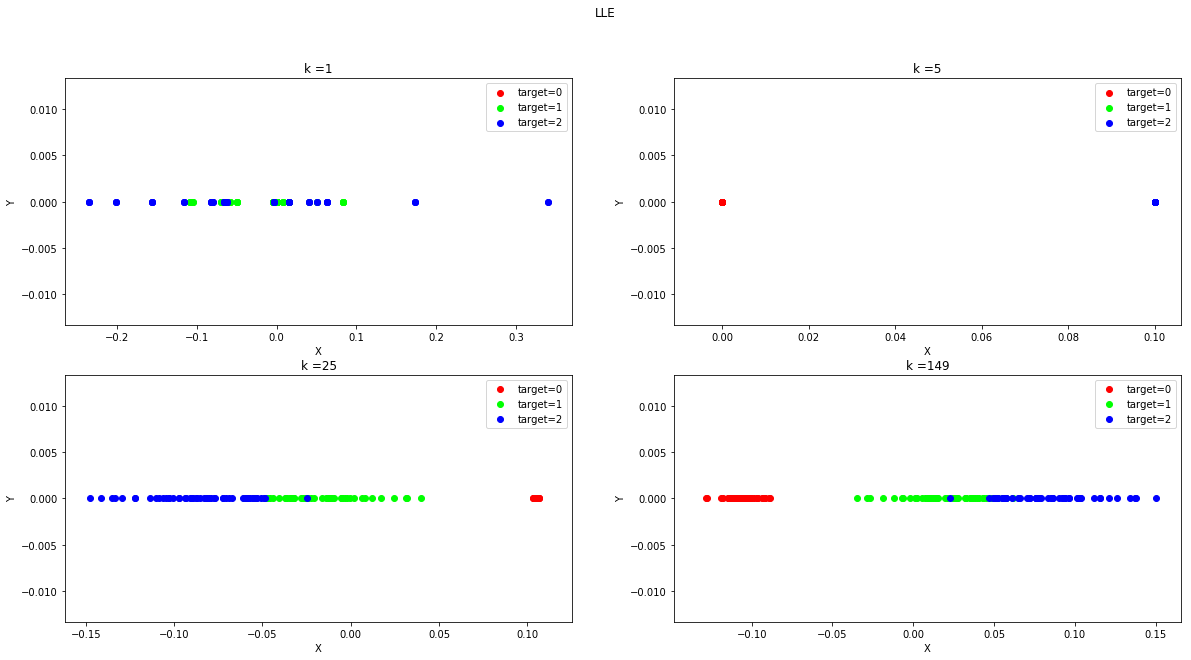

In [14]:
# 将数据降低至1维
def plot_Isomap_k_d1(*data):
    x,y = data
    Ks = [1,5,25,y.size-1]
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    for i,k in enumerate(Ks):
        lle = manifold.LocallyLinearEmbedding(n_components=1, n_neighbors=k)
        x_r = lle.fit_transform(x)
        
        ax = fig.add_subplot(2,2,i+1)
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0], np.zeros_like(x_r[position]), label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='best')
        ax.set_title('k ={0}'.format(k))
    plt.suptitle('LLE')
    plt.show()

x,y =load_data()
plot_Isomap_k_d1(x,y)